In [2]:
# 코드 목적 : 레어 메뉴는 더 품절률이 높냐  -> dinner에서는 4이상 나온게 오히려 품절률이 높음. (lunch는 반대)
# 코드 작성일 : 24.8.6 

In [3]:
import os

if 'original_dir' not in globals() :
    original_dir = os.getcwd()
    original_dir = os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(original_dir)))))
    os.chdir(original_dir)
exec(open('setup/default.py').read())
import scipy.stats as stats


/Users/al01989093/anaconda3/envs/first_pytorch/lib/python3.11/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [4]:
menu_w_sold_out = pd.read_csv(os.getcwd()+'/data/preproc/main/feature_lab_v1/menu_w_soldout_w_first_menu.csv')
menu_w_sold_out['menu_no'] = menu_w_sold_out.groupby(['day', 'meal_time'])['day'].transform('size')
menu_w_sold_out = menu_w_sold_out[['post_no','day','meal_time','course_no','first_menu','menu_no','is_soldout']]
target_w_sold_out = menu_w_sold_out[(menu_w_sold_out.menu_no>1)&
                     (menu_w_sold_out.day>='2023-06-01')].reset_index(drop=True)
target_w_sold_out.loc[:, 'rep'] = 0

In [5]:
first_menu_similarity = pd.read_csv(os.getcwd()+'/data/preproc/main/feature_lab_v1/first_menu_similarity.csv')

threshold = 0.7
first_menu_similarity = first_menu_similarity.loc[first_menu_similarity.sim_score>=threshold,['target_menu','menu','sim_score']]

In [6]:
target_w_sold_out['sim_menu'] = 0
target_w_sold_out['only_menu_2'] = 0
target_w_sold_out['only_menu_2_soldout'] = 0
target_w_sold_out['soldout_ratio'] = float('nan')

In [7]:
for i in tqdm(range(target_w_sold_out.shape[0])):
    target_menu, target_date, target_mt = target_w_sold_out.loc[i, ['first_menu', 'day', 'meal_time']]
    # 유사 메뉴 
    sim_menu = first_menu_similarity[first_menu_similarity.target_menu == target_menu].menu.tolist()
    # 구간 시작일 
    start_date = (datetime.strptime(target_date, "%Y-%m-%d") - relativedelta(months=6) + relativedelta(days=1)).strftime('%Y-%m-%d')
    if target_mt == 'lunch' : # lunch인 경우 (6달 전 ~ 어제)
        target_df = menu_w_sold_out[(menu_w_sold_out.day>=start_date) & 
                            (menu_w_sold_out.day<target_date) &
                            (menu_w_sold_out.first_menu.isin(sim_menu))
                            ]
    else : # dinner 인 경우 (6달 전 ~ 오늘 점심)
        target_df = menu_w_sold_out[(menu_w_sold_out.day>=start_date) & 
                            (menu_w_sold_out.day<=target_date)&
                            ((menu_w_sold_out.day!=target_date)|(menu_w_sold_out.meal_time!='dinner')) &
                            (menu_w_sold_out.first_menu.isin(sim_menu))
                            ]    
    
    sim_menu = len(target_df) # 몇번 나왔는지?
    # 품절률 계산용 
    only_menu_2 = (target_df['menu_no'] >= 2).sum() # 메뉴 2개 이상 나온 경우
    only_menu_2_soldout = ((target_df['menu_no'] >= 2) & target_df['is_soldout']).sum() # 메뉴 2개 이상 나왔는데 품절
    if only_menu_2>0 :
        soldout_ratio = only_menu_2_soldout/only_menu_2
    else :
        soldout_ratio = float('nan')

    target_w_sold_out.loc[i, ['sim_menu', 'only_menu_2', 'only_menu_2_soldout', 'soldout_ratio']] = sim_menu, only_menu_2, only_menu_2_soldout, soldout_ratio




100%|██████████| 814/814 [00:00<00:00, 848.18it/s]


In [1]:
target_w_sold_out

NameError: name 'target_w_sold_out' is not defined

In [30]:
target_w_sold_out[(target_w_sold_out['day'] <= '2024-04-09') & (target_w_sold_out['first_menu'].str.contains('볶음밥'))]


,post_no,day,meal_time,course_no,first_menu,menu_no,is_soldout,rep,sim_menu,only_menu_2,only_menu_2_soldout,soldout_ratio
5,926901222,2023-06-02,lunch,[2],소고기미나리볶음밥,2,False,0,7,7,3,0.428571
15,926901230,2023-06-08,dinner,[2],소고기할라피뇨볶음밥,2,True,0,7,7,2,0.285714
33,926901242,2023-06-15,dinner,[2],소고기우엉볶음밥,2,False,0,8,8,3,0.375000
41,926901248,2023-06-20,lunch,[2],베이컨갈릭볶음밥,2,False,0,2,2,0,0.000000
47,926901251,2023-06-21,dinner,[2],차돌깍두기볶음밥,2,True,0,4,3,1,0.333333
73,926901278,2023-07-05,dinner,[2],새우볶음밥,2,False,0,2,2,2,1.000000
101,926901303,2023-07-19,lunch,[2],잠발라야볶음밥,2,True,0,1,1,0,0.000000
107,926901308,2023-07-21,lunch,[2],소고기미나리볶음밥,2,False,0,7,7,1,0.142857
111,926901314,2023-07-24,dinner,[2],소고기깍두기볶음밥,2,False,0,12,11,2,0.181818
125,926901326,2023-07-31,lunch,[2],베이컨갈릭볶음밥,2,True,0,3,3,0,0.000000


In [31]:
target_w_sold_out

,post_no,day,meal_time,course_no,first_menu,menu_no,is_soldout,rep,sim_menu,only_menu_2,only_menu_2_soldout,soldout_ratio
0,926901220,2023-06-01,lunch,[1],옛날짜장면,2,False,0,4,4,2,0.500000
1,926901220,2023-06-01,lunch,[2],감자짜글이김치찌개,2,False,0,1,1,1,1.000000
2,926901221,2023-06-01,dinner,[1],닭갈비,2,True,0,5,5,3,0.600000
3,926901221,2023-06-01,dinner,[2],불고기핫도그,2,False,0,0,0,0,NaN
4,926901222,2023-06-02,lunch,[1],철판오징어볶음,2,False,0,3,2,1,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
809,926901861,2024-05-30,lunch,[2],베이컨갈릭볶음밥,2,True,0,7,6,5,0.833333
810,926901862,2024-05-30,dinner,[1],소고기샤브샤브,2,False,0,1,1,0,0.000000
811,926901862,2024-05-30,dinner,[2],마파두부덮밥,2,False,0,4,4,2,0.500000
812,926901863,2024-05-31,lunch,[1],돈목살짜장면,2,False,0,2,2,1,0.500000


In [26]:
target_w_sold_out[target_w_sold_out.sim_menu>20]

,post_no,day,meal_time,course_no,first_menu,menu_no,is_soldout,rep,sim_menu,only_menu_2,only_menu_2_soldout,soldout_ratio
213,926901391,2023-09-06,lunch,[2],중국식볶음밥,2,False,0,26,25,7,0.280000
265,926901441,2023-10-05,dinner,[2],중국식볶음밥,2,False,0,25,25,7,0.280000
433,926901572,2023-12-18,lunch,[2],중국식볶음밥,2,False,0,27,27,9,0.333333
695,926901773,2024-04-09,lunch,[2],중국식볶음밥,2,True,0,29,28,13,0.464286


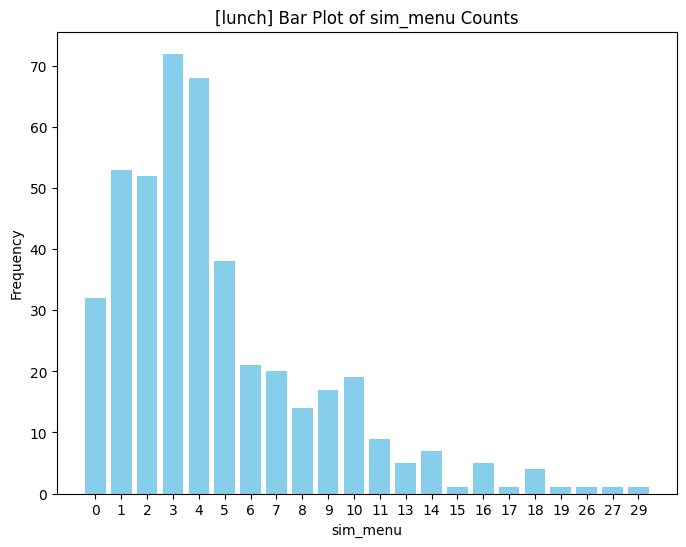

In [32]:
# 6개월 내 비슷한 메뉴 수 분포 
import matplotlib.pyplot as plt
# groupby와 size를 사용하여 집계
grouped_data = target_w_sold_out[target_w_sold_out.meal_time=='lunch'].groupby(['sim_menu'],dropna = False).size().to_frame('size').reset_index()

# 히스토그램 그리기
plt.figure(figsize=(8, 6))
plt.bar(grouped_data['sim_menu'].astype(str), grouped_data['size'], color='skyblue')
plt.xlabel('sim_menu')
plt.ylabel('Frequency')
plt.title('[lunch] Bar Plot of sim_menu Counts')
plt.show()


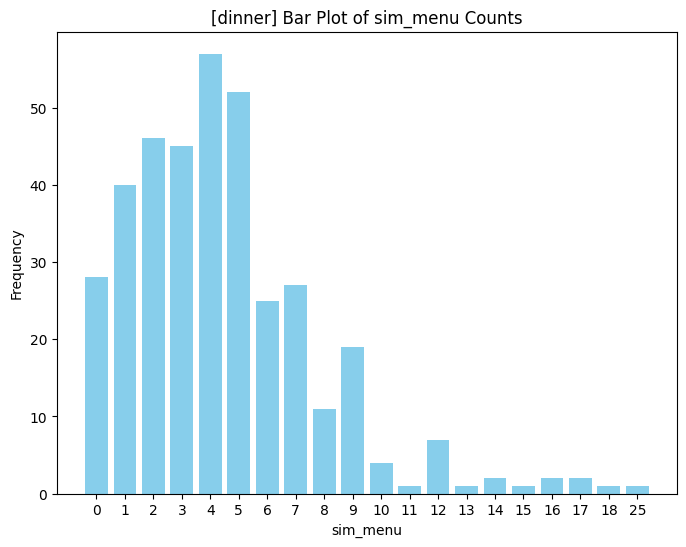

In [33]:
# 6개월 내 비슷한 메뉴 수 분포 
import matplotlib.pyplot as plt
# groupby와 size를 사용하여 집계
grouped_data = target_w_sold_out[target_w_sold_out.meal_time=='dinner'].groupby(['sim_menu'],dropna = False).size().to_frame('size').reset_index()

# 히스토그램 그리기
plt.figure(figsize=(8, 6))
plt.bar(grouped_data['sim_menu'].astype(str), grouped_data['size'], color='skyblue')
plt.xlabel('sim_menu')
plt.ylabel('Frequency')
plt.title('[dinner] Bar Plot of sim_menu Counts')
plt.show()


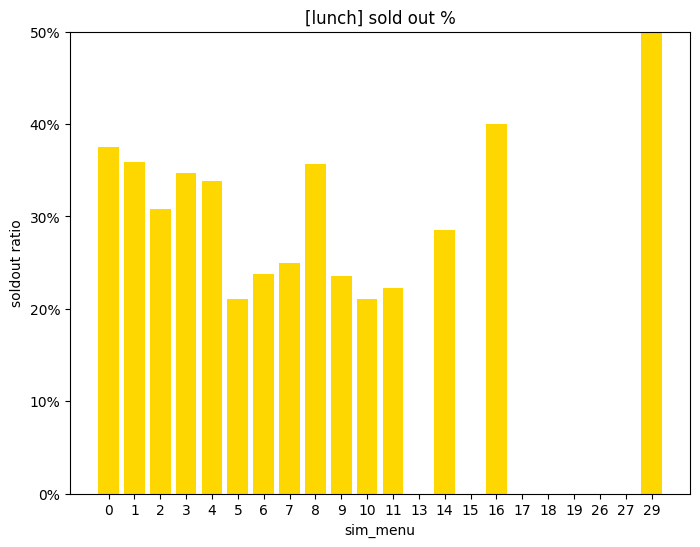

In [35]:

# 품절률
grouped_data = target_w_sold_out[target_w_sold_out.meal_time=='lunch'].groupby(['sim_menu'],dropna=False).agg(
    tot = ('is_soldout','size'), 
    soldout = ('is_soldout',lambda x: x.sum())
).reset_index()
grouped_data['ratio'] = grouped_data['soldout']/ grouped_data['tot']

# 히스토그램 그리기
plt.figure(figsize=(8, 6))
plt.bar(grouped_data['sim_menu'].astype(str), grouped_data['ratio'], color='gold')
plt.xlabel('sim_menu')
plt.ylabel('soldout ratio')
plt.title('[lunch] sold out %')
plt.ylim(0, 0.5) 
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x*100)}%'))
plt.show()


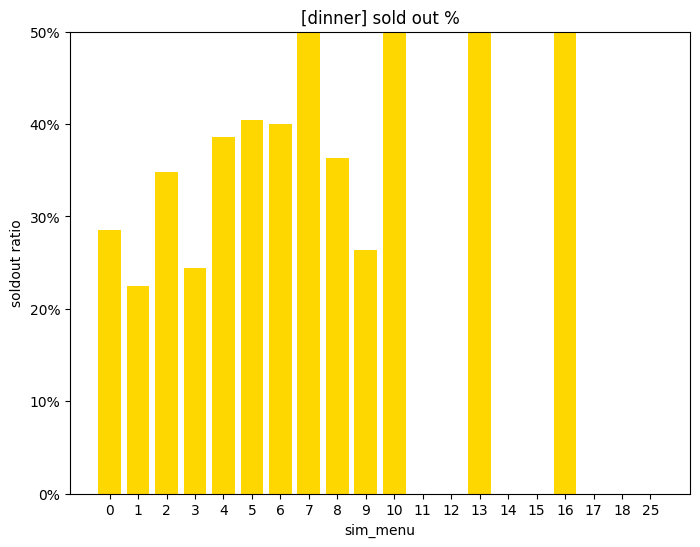

In [36]:

# 품절률
grouped_data = target_w_sold_out[target_w_sold_out.meal_time=='dinner'].groupby(['sim_menu'],dropna=False).agg(
    tot = ('is_soldout','size'), 
    soldout = ('is_soldout',lambda x: x.sum())
).reset_index()
grouped_data['ratio'] = grouped_data['soldout']/ grouped_data['tot']

# 히스토그램 그리기
plt.figure(figsize=(8, 6))
plt.bar(grouped_data['sim_menu'].astype(str), grouped_data['ratio'], color='gold')
plt.xlabel('sim_menu')
plt.ylabel('soldout ratio')
plt.title('[dinner] sold out %')
plt.ylim(0, 0.5) 
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x*100)}%'))
plt.show()
